In [1]:
from plotnine import *

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

/home/chris/.local/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/home/chris/.local/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## LMC

In [2]:
lmc_file = "RRab_lmc_colors.csv"
lmc = pd.read_csv(lmc_file)

AMPLITUDE = "I_amplitude"
PERIOD = "period"

lmc = lmc.dropna()

print(lmc.info())
lmc.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23903 entries, 0 to 28184
Data columns (total 23 columns):
I_amplitude           23903 non-null float64
R21                   23903 non-null float64
R31                   23903 non-null float64
V-I_max               23903 non-null float64
V-I_min               23903 non-null float64
V_amplitude           23903 non-null float64
id                    23903 non-null object
log_p                 23903 non-null float64
mean_I_magnitude      23903 non-null float64
mean_V_magnitude      23903 non-null float64
metalicity_jk_v       23903 non-null float64
metalicity_jkzw_v     23903 non-null float64
metalicity_neme       23903 non-null float64
metalicity_sand       23903 non-null float64
metalicity_smol       23903 non-null float64
period                23903 non-null float64
period_uncertainty    23903 non-null float64
phi21                 23903 non-null float64
phi31                 23903 non-null float64
phi31_i_sine          23903 non-null 

,I_amplitude,R21,R31,V-I_max,V-I_min,V_amplitude,log_p,mean_I_magnitude,mean_V_magnitude,metalicity_jk_v,...,metalicity_sand,metalicity_smol,period,period_uncertainty,phi21,phi31,phi31_i_sine,phi31_v_deb,phi31_v_skow,time_max_bright
count,23903.000000,23903.000000,23903.000000,23903.000000,23903.000000,23903.000000,23903.000000,23903.000000,23903.000000,23903.000000,...,23903.000000,23903.000000,23903.000000,2.390300e+04,23903.000000,23903.000000,23903.000000,23903.000000,23903.000000,23903.000000
mean,0.546320,0.450708,0.301774,2.032028,-0.872720,1.013632,-0.242474,18.745808,19.342172,-1.351912,...,-1.680438,-1.265137,0.576288,1.549483e-06,4.326191,2.564506,5.706099,5.034232,5.051736,6000.287249
std,0.175543,0.058024,0.073498,28.540727,22.632416,0.364053,0.052065,0.459851,0.485511,0.310531,...,0.465960,0.275595,0.069226,1.427968e-06,0.217696,0.479445,0.479445,0.272325,0.324403,0.171584
min,0.018000,0.070000,0.047000,-1.464194,-1594.753711,0.043000,-0.588872,12.785000,13.351000,-3.180336,...,-9.044158,-3.569295,0.257708,1.000000e-07,3.185000,0.020000,3.161593,3.588953,4.179277,6000.000010
25%,0.422000,0.422000,0.255500,0.661046,0.248690,0.776000,-0.276601,18.666000,19.224000,-1.516971,...,-1.882741,-1.412291,0.528931,7.000000e-07,4.160000,2.208000,5.349593,4.831737,4.810219,6000.140740
50%,0.549000,0.459000,0.320000,0.712579,0.350095,1.010000,-0.240997,18.785000,19.357000,-1.374432,...,-1.651827,-1.274897,0.574121,1.200000e-06,4.289000,2.509000,5.650593,5.002705,4.988418,6000.282660
75%,0.674000,0.488000,0.360000,0.792407,0.453632,1.220500,-0.208588,18.904000,19.505000,-1.227326,...,-1.439173,-1.136810,0.618603,1.900000e-06,4.471000,2.880000,6.021593,5.213433,5.238474,6000.426170
max,1.632000,0.899000,0.856000,2532.312886,1.687388,5.968000,-0.014567,20.558000,21.925000,4.672178,...,1.133241,2.341477,0.967014,4.270000e-05,5.669000,6.271000,9.412593,7.139521,9.080377,6000.861730


Let's compute a density estimate for the data points. This will let us see the clustering of the data and help later on for narrowing down the data for curve fitting.

In [3]:
from scipy import stats

x_a = np.array(lmc[PERIOD])
y_a = np.array(lmc[AMPLITUDE])
points = np.vstack([x_a.ravel(), y_a.ravel()])

xmin, xmax = min(x_a), max(x_a)
ymin, ymax = min(y_a), max(y_a)

x, y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([x.ravel(), y.ravel()])
values = np.vstack([x_a, y_a])
kernel = stats.gaussian_kde(values)

In [4]:
lmc["density"] = kernel.evaluate(points)

/home/chris/.local/lib/python3.5/site-packages/plotnine/layer.py:459: UserWarning: geom_point : Removed 24 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


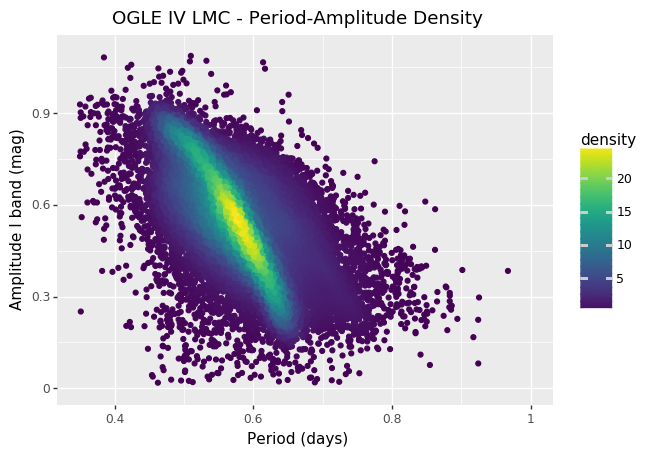

<ggplot: (8771547843606)>

In [60]:
ggplot(lmc, aes(PERIOD, AMPLITUDE, color="density")) +\
    geom_point() +\
    xlab("Period (days)") +\
    ylab("Amplitude I band (mag)") +\
    ggtitle("OGLE IV LMC - Period-Amplitude Density") +\
    xlim(0.35, 1.0) +\
    ylim(0.0, 1.1)

Here we can see that there is a section of the data plot where the points cluster densly along a curve. The boundry between the Oost I and Oost II groups also looks like it follows a similar trend.

Let's try to get the equation for that line.

If we just were to take the overall trend of the data, then the resulting fit curve would be different from that of the dense area, so let's just fit the curve to the more dense area.

In [6]:
dense = lmc[lmc["density"] > 12]

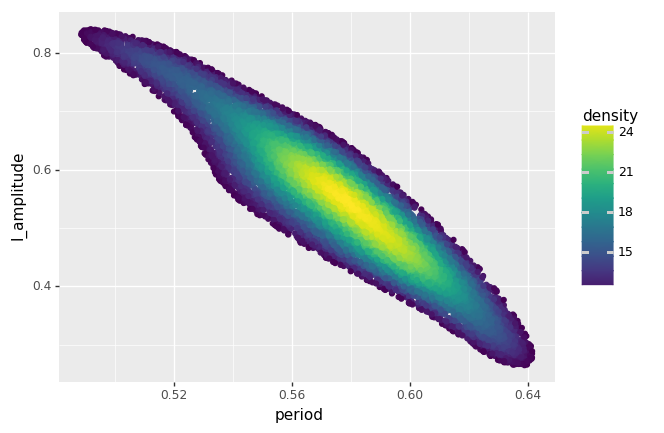

<ggplot: (-9223363265291080851)>

In [7]:
ggplot(dense, aes(PERIOD, AMPLITUDE, color="density")) +\
    geom_point()

For the curve model to fit to the data we will go with a 3rd degree polynomial. A 2nd degree polynomial seems like it would fit the curve better, but using a 3rd degree polynomial will help improve the clustering boundary results.

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

X_reg = dense.as_matrix([PERIOD])
y_reg = dense.as_matrix([AMPLITUDE])

poly = PolynomialFeatures(degree=3)
reg = LinearRegression()

poly_regression = make_pipeline(poly, reg)

poly_regression.fit(X_reg, y_reg)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

The equation for the line we have fit is the following:

In [9]:
coef = reg.coef_

print("amp = %f + %f * per + %f * per^2 + %f * per^3" % (coef[0][0], coef[0][1], coef[0][2], coef[0][3]))

amp = 0.000000 + -85.279697 * per + 147.100499 * per^2 + -88.072173 * per^3


Now let's apply the fit curve function to the period values in the dataset so that we can overlay the curve on the data and see how well it fits.

In [10]:
X_curve = lmc.as_matrix([PERIOD])
y_curve = poly_regression.predict(X_curve)

lmc["curve"] = y_curve

/home/chris/.local/lib/python3.5/site-packages/plotnine/layer.py:459: UserWarning: geom_point : Removed 3 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/home/chris/.local/lib/python3.5/site-packages/plotnine/layer.py:459: UserWarning: geom_point : Removed 1767 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


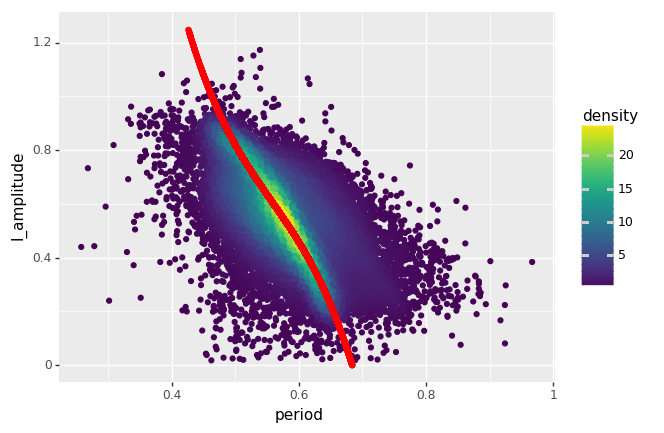

<ggplot: (-9223363265302125631)>

In [11]:
ggplot(lmc, aes(PERIOD, AMPLITUDE, color="density")) +\
    geom_point() +\
    geom_point(aes(PERIOD, "curve"), color="Red") +\
    ylim(0.0, 1.25)

The curve seems to fit the data reasonably well. The 3rd degree nature of the fit seems odd at the ends of the data space, but it will help in the clustering.

Now that we have the equation for the curve, let's try warping the data space around the curve to create a new feature to use for clustering.

In [12]:
lmc["y"] = lmc[AMPLITUDE] - lmc["curve"]

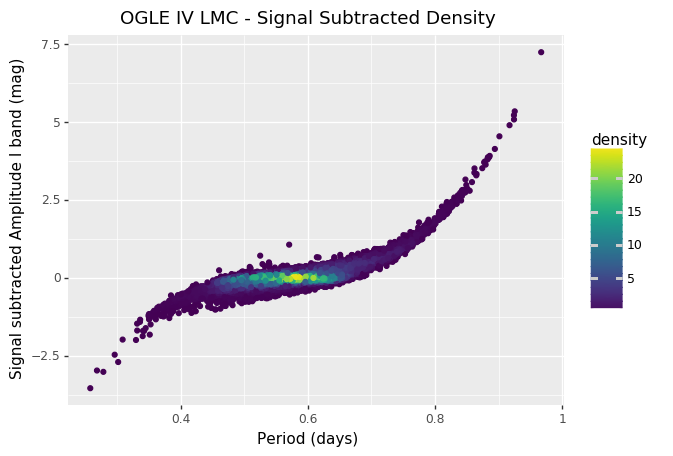

<ggplot: (-9223363265302313184)>

In [13]:
ggplot(lmc, aes(PERIOD, "y", color="density")) +\
    geom_point() +\
    xlab("Period (days)") +\
    ylab("Signal subtracted Amplitude I band (mag)") +\
    ggtitle("OGLE IV LMC - Signal Subtracted Density")

Since the boundary between the Oost I and Oost II seems to follow a similar shape to the curve we bent the space over, in this new feature `y` a horizontal line should form a properly shaped decision boundary.

Let's now try doings some clustering using this new feature. For now we will use KMeans with 3 clusters as this provides good clustering in relation to the Oosterhoff groups.

A similar approach with 2 clusters was attempted, but it did not properly approximate the boundary between the Oosterhoff groups.

In [14]:
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

X_clustering = lmc.as_matrix(["y"])

num_clusters = 3
clustering = KMeans(n_clusters=num_clusters, random_state=0)
scaler = StandardScaler()

clustering_pipe = make_pipeline(scaler, clustering)

clusters = clustering_pipe.fit_predict(X_clustering)

In [15]:
lmc["clusters"] = clusters

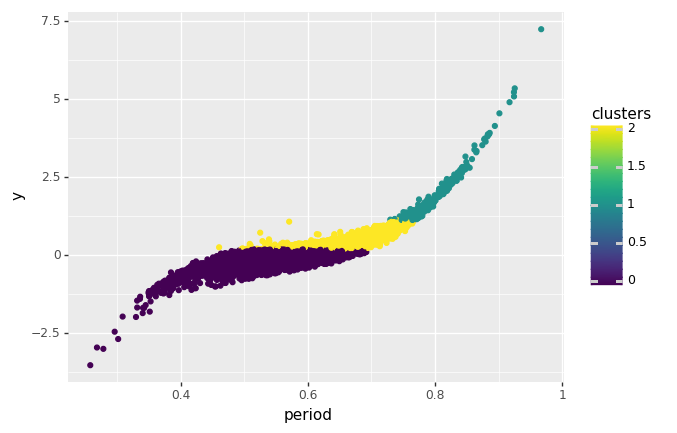

<ggplot: (-9223363265307065235)>

In [16]:
ggplot(lmc, aes(PERIOD, "y", color="clusters")) +\
    geom_point()

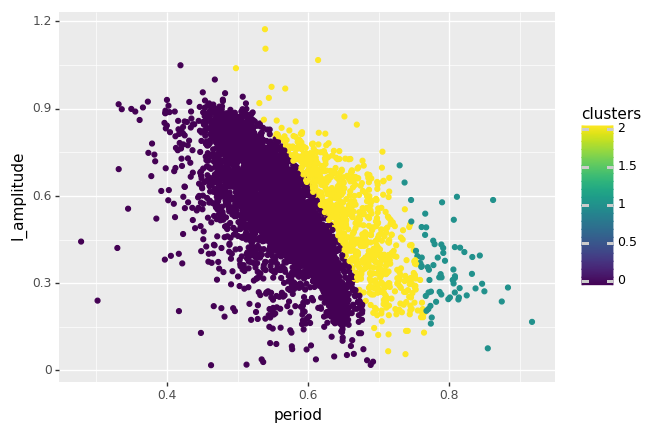

<ggplot: (-9223363265302385860)>

In [17]:
ggplot(lmc.iloc[:5000], aes(PERIOD, AMPLITUDE, color="clusters")) +\
    geom_point()

Here we can see that the points in the cluster `0` appear to be those in the Oost I group, and the points in the clusters `1` and `2` appear to be those in the Oost II group.

Let's simplify these clusters into a binary feature for Oosterhoff group.

In [18]:
lmc["is_oost_ii"] = lmc["clusters"].map(lambda x: x != 0)

/home/chris/.local/lib/python3.5/site-packages/plotnine/layer.py:459: UserWarning: geom_point : Removed 3 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


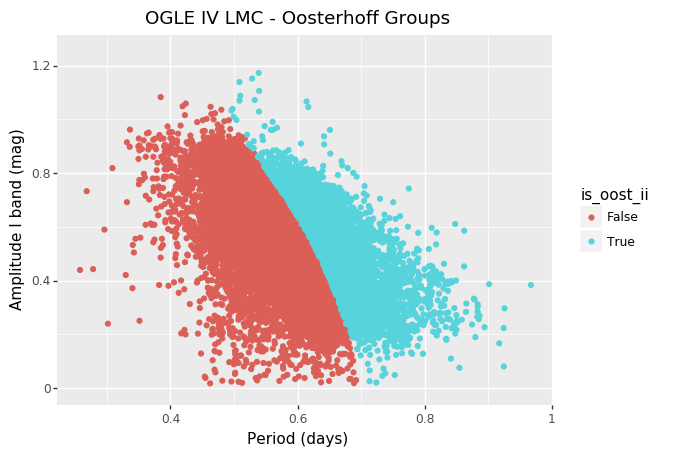

<ggplot: (-9223363265291080907)>

In [19]:
ggplot(lmc, aes(PERIOD, AMPLITUDE, color="is_oost_ii")) +\
    geom_point() +\
    ylim(0.0, 1.25) +\
    xlab("Period (days)") +\
    ylab("Amplitude I band (mag)") +\
    ggtitle("OGLE IV LMC - Oosterhoff Groups")

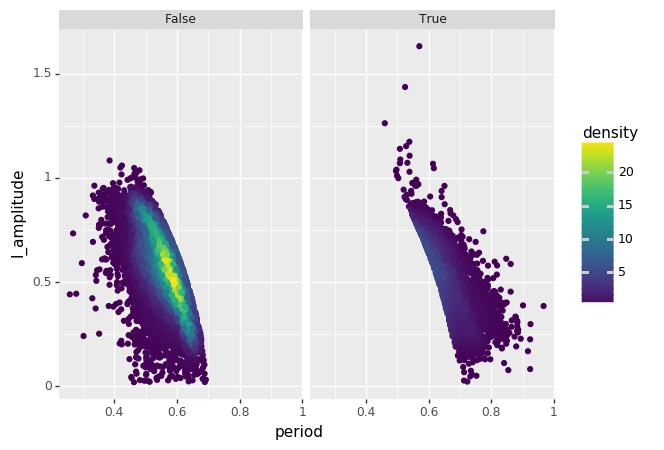

<ggplot: (-9223363265306938259)>

In [20]:
ggplot(lmc, aes(PERIOD, AMPLITUDE, color="density")) +\
    facet_wrap("~is_oost_ii") +\
    geom_point()

So now that we have performed the clustering, let's get the equation for the decision boundary between the two Oosterhoff groups.

In [21]:
boundary_y = lmc[lmc["clusters"] == 0]["y"].max()

In [22]:
print("amp = %f + %f + %f * per + %f * per^2 + %f * per^3" % (boundary_y, coef[0][0], coef[0][1], coef[0][2], coef[0][3]))

amp = 0.179678 + 0.000000 + -85.279697 * per + 147.100499 * per^2 + -88.072173 * per^3


Let's plot the decision boundary to double check that we have the correct equation.

In [23]:
X_boundary = lmc.as_matrix([PERIOD])
y_boundary = poly_regression.predict(X_boundary) + boundary_y

lmc["boundary"] = y_boundary

/home/chris/.local/lib/python3.5/site-packages/plotnine/layer.py:459: UserWarning: geom_point : Removed 3 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/home/chris/.local/lib/python3.5/site-packages/plotnine/layer.py:459: UserWarning: geom_point : Removed 1458 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


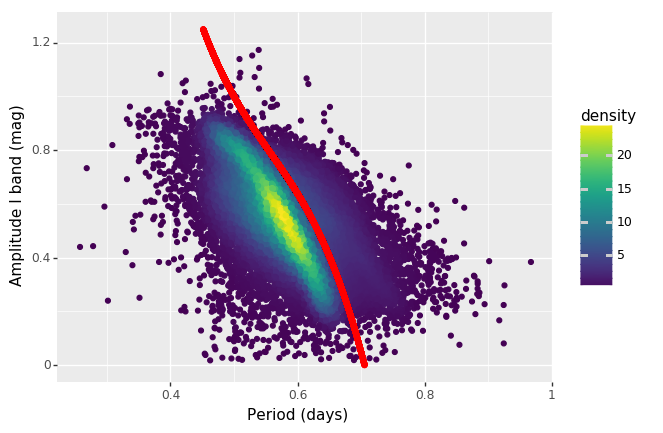

<ggplot: (-9223363265302382020)>

In [24]:
ggplot(lmc, aes(PERIOD, AMPLITUDE, color="density")) +\
    geom_point() +\
    geom_point(aes(PERIOD, "boundary"), color="Red") +\
    ylim(0.0, 1.25) +\
    xlab("Period (days)") +\
    ylab("Amplitude I band (mag)")

In [25]:
lmc.to_csv("RRab_lmc_oost.csv", index=False)

## SMC
Now let's try applying the same approach to the SMC data.

In [26]:
smc_file = "RRab_smc_colors.csv"
#smc_file = "~/Documents/ogle/ogle4/smc/RRab.csv"
#AMPLITUDE = "amplitude_Iband"
smc = pd.read_csv(smc_file)

In [27]:
from scipy import stats

x_a = np.array(smc[PERIOD])
y_a = np.array(smc[AMPLITUDE])
points = np.vstack([x_a.ravel(), y_a.ravel()])

xmin, xmax = min(x_a), max(x_a)
ymin, ymax = min(y_a), max(y_a)

x, y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([x.ravel(), y.ravel()])
values = np.vstack([x_a, y_a])
kernel = stats.gaussian_kde(values)

In [28]:
smc["density"] = kernel.evaluate(points)

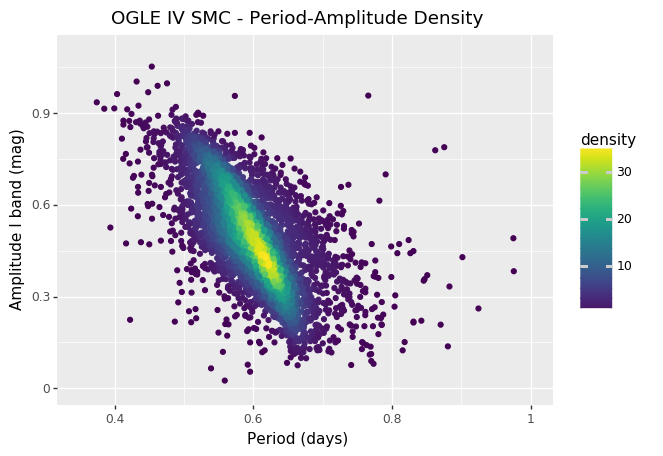

<ggplot: (8771552329199)>

In [61]:
ggplot(smc, aes(PERIOD, AMPLITUDE, color="density")) +\
    geom_point() +\
    xlab("Period (days)") +\
    ylab("Amplitude I band (mag)") +\
    ggtitle("OGLE IV SMC - Period-Amplitude Density") +\
    xlim(0.35, 1.0) +\
    ylim(0.0, 1.1)

In [57]:
dense_smc = smc[smc["density"] > 23]

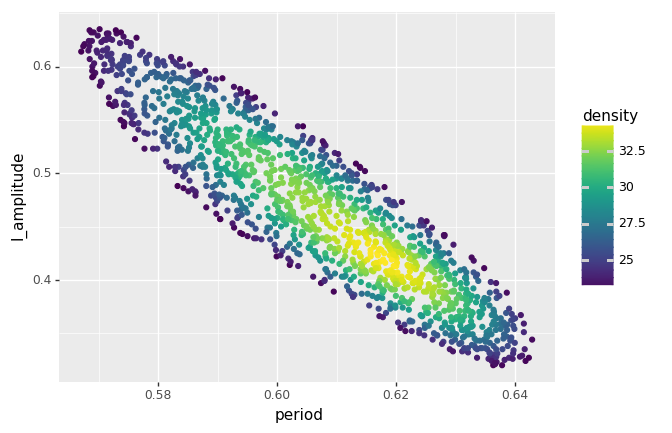

<ggplot: (-9223363265309734098)>

In [31]:
ggplot(dense_smc, aes(PERIOD, AMPLITUDE, color="density")) +\
    geom_point()

In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

X_reg = dense_smc.as_matrix([PERIOD])
y_reg = dense_smc.as_matrix([AMPLITUDE])

poly = PolynomialFeatures(degree=3)
reg = LinearRegression()

poly_regression = make_pipeline(poly, reg)

poly_regression.fit(X_reg, y_reg)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [33]:
coef = reg.coef_

print("amp = %f + %f * per + %f * per^2 + %f * per^3" % (coef[0][0], coef[0][1], coef[0][2], coef[0][3]))

amp = 0.000000 + -144.389283 * per + 233.289503 * per^2 + -128.908447 * per^3


In [34]:
X_curve = smc.as_matrix([PERIOD])
y_curve = poly_regression.predict(X_curve)

smc["curve"] = y_curve

/home/chris/.local/lib/python3.5/site-packages/plotnine/layer.py:459: UserWarning: geom_point : Removed 285 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


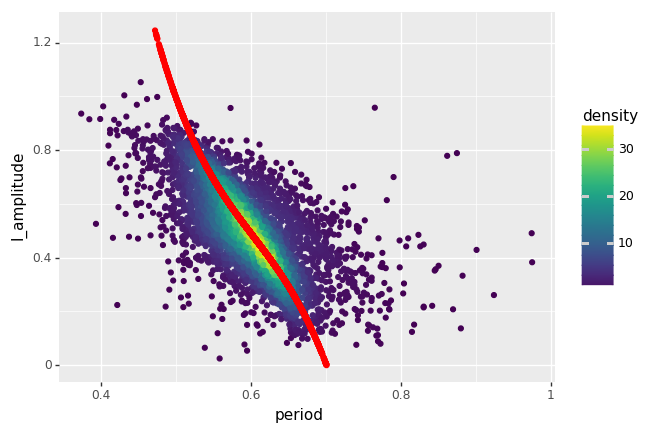

<ggplot: (-9223363265302350041)>

In [35]:
ggplot(smc, aes(PERIOD, AMPLITUDE, color="density")) +\
    geom_point() +\
    geom_point(aes(PERIOD, "curve"), color="Red") +\
    ylim(0.0, 1.25)

In [36]:
smc["y"] = smc[AMPLITUDE] - smc["curve"]

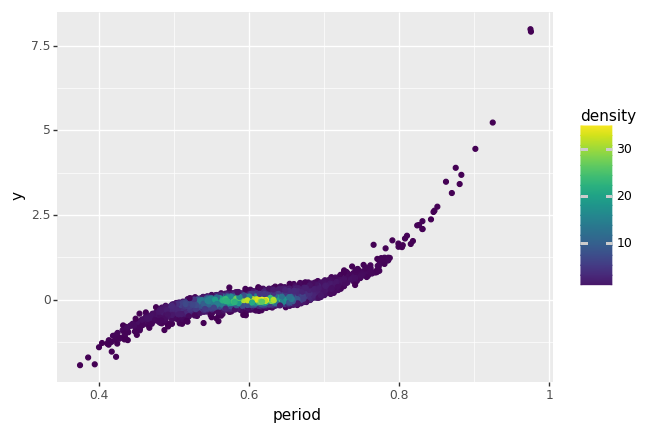

<ggplot: (8771552426788)>

In [37]:
ggplot(smc, aes(PERIOD, "y", color="density")) +\
    geom_point()

In [38]:
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

X_clustering = smc.as_matrix(["y"])

num_clusters = 3
clustering = KMeans(n_clusters=num_clusters, random_state=0)
scaler = StandardScaler()

clustering_pipe = make_pipeline(scaler, clustering)

clusters = clustering_pipe.fit_predict(X_clustering)

In [39]:
smc["clusters"] = clusters

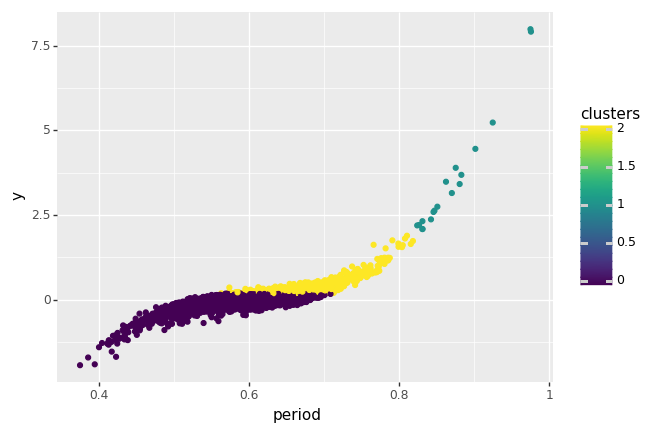

<ggplot: (8771563963582)>

In [40]:
ggplot(smc, aes(PERIOD, "y", color="clusters")) +\
    geom_point()

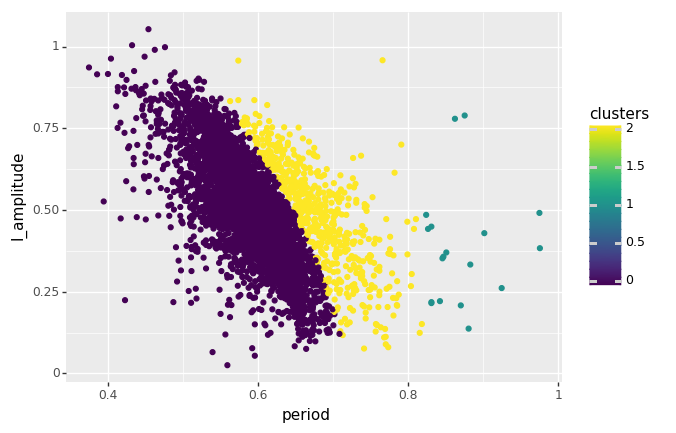

<ggplot: (8771552325089)>

In [41]:
ggplot(smc, aes(PERIOD, AMPLITUDE, color="clusters")) +\
    geom_point()

In [42]:
smc["is_oost_ii"] = smc["clusters"].map(lambda x: x != 0)

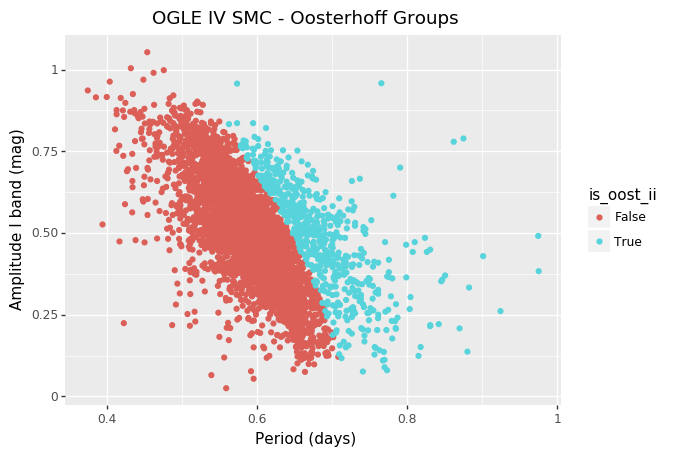

<ggplot: (-9223363265302604607)>

In [43]:
ggplot(smc, aes(PERIOD, AMPLITUDE, color="is_oost_ii")) +\
    geom_point() +\
    xlab("Period (days)") +\
    ylab("Amplitude I band (mag)") +\
    ggtitle("OGLE IV SMC - Oosterhoff Groups")

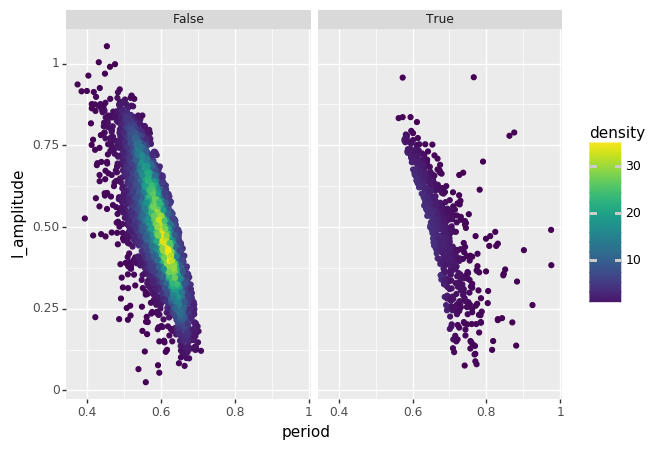

<ggplot: (8771547825286)>

In [44]:
ggplot(smc, aes(PERIOD, AMPLITUDE, color="density")) +\
    facet_wrap("~is_oost_ii") +\
    geom_point()

In [45]:
boundary_y = smc[smc["clusters"] == 0]["y"].max()

In [46]:
print("amp = %f + %f + %f * per + %f * per^2 + %f * per^3" % (boundary_y, coef[0][0], coef[0][1], coef[0][2], coef[0][3]))

amp = 0.184571 + 0.000000 + -144.389283 * per + 233.289503 * per^2 + -128.908447 * per^3


In [47]:
X_boundary = smc.as_matrix([PERIOD])
y_boundary = poly_regression.predict(X_boundary) + boundary_y

smc["boundary"] = y_boundary

/home/chris/.local/lib/python3.5/site-packages/plotnine/layer.py:459: UserWarning: geom_point : Removed 275 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


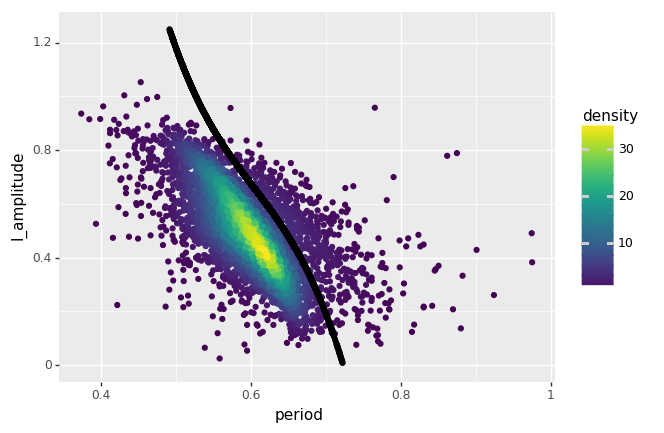

<ggplot: (8771563990834)>

In [48]:
ggplot(smc, aes(PERIOD, AMPLITUDE, color="density")) +\
    geom_point() +\
    geom_point(aes(PERIOD, "boundary"), color="Black") +\
    ylim(0.0, 1.25)

In [49]:
smc.to_csv("RRab_smc_oost.csv", index=False)

/home/chris/.local/lib/python3.5/site-packages/plotnine/layer.py:459: UserWarning: geom_point : Removed 1458 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/home/chris/.local/lib/python3.5/site-packages/plotnine/layer.py:459: UserWarning: geom_point : Removed 275 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


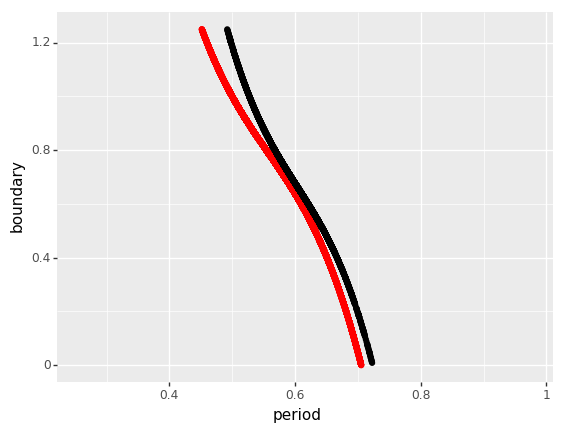

<ggplot: (-9223363265310076784)>

In [50]:
ggplot(lmc, aes("period", "boundary")) +\
    geom_point(color="Red") +\
    geom_point(smc, aes("period", "boundary")) +\
    ylim(0.0, 1.25)

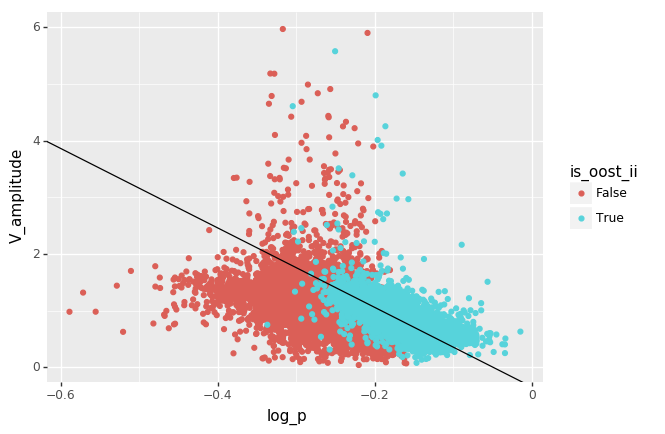

<ggplot: (-9223363265306959977)>

In [51]:
ggplot(lmc, aes("log_p", "V_amplitude", color="is_oost_ii")) +\
    geom_point() +\
    geom_abline(slope=-7.007, intercept=-0.343)

/home/chris/.local/lib/python3.5/site-packages/plotnine/layer.py:459: UserWarning: geom_point : Removed 2 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


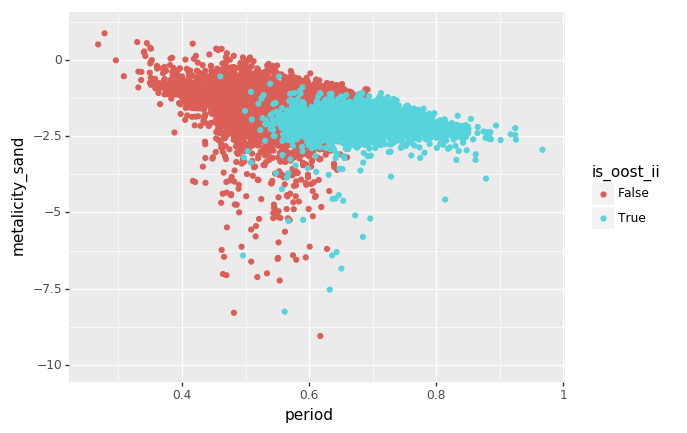

<ggplot: (8771545313912)>

In [52]:
ggplot(lmc, aes("period", "metalicity_sand", color="is_oost_ii")) +\
    geom_point() +\
    ylim(-10.0, 1.0)

/home/chris/.local/lib/python3.5/site-packages/plotnine/layer.py:459: UserWarning: geom_point : Removed 831 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


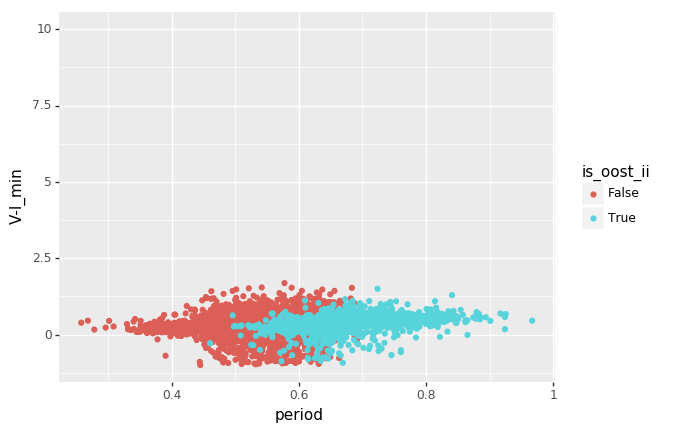

<ggplot: (8771563704689)>

In [53]:
ggplot(lmc, aes("period", "V-I_min", color="is_oost_ii")) +\
    geom_point() +\
    ylim(-1.0, 10.0)

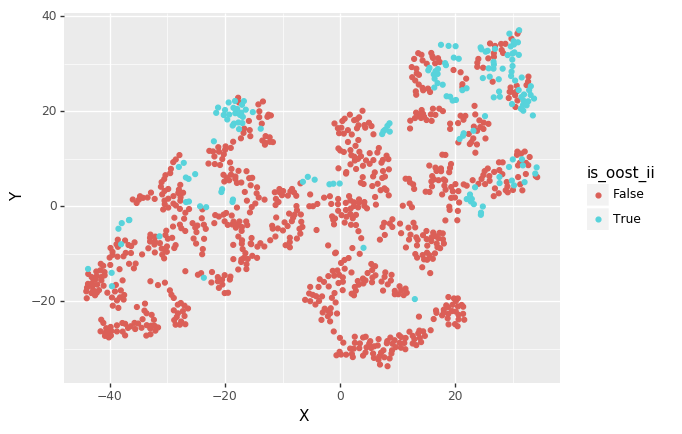

<ggplot: (8771552225814)>

In [54]:
from sklearn.manifold import TSNE

tsne = TSNE(2)

limit = 1000

#tsne_cols = ["I_amplitude", "R21", "R31", "V-I_max", "V-I_min", "V_amplitude", "metalicity_jk_v"
#             , "metalicity_jkzw_v", "metalicity_neme", "metalicity_smol", "period", "phi21", "phi31"]

tsne_cols = ["I_amplitude", "period", "metalicity_jkzw_v"]

y_tsne = np.array(lmc["is_oost_ii"])[:limit]
X_tsne = lmc.as_matrix(tsne_cols)[:limit]

X_tsne_trans = pd.DataFrame(tsne.fit_transform(X_tsne))
X_tsne_trans.columns = ["X", "Y"]
X_tsne_trans["is_oost_ii"] = y_tsne

ggplot(X_tsne_trans, aes("X", "Y", color="is_oost_ii")) +\
    geom_point()